<a href="https://colab.research.google.com/github/chaves08r/on29-python-s15-visualizacao-de-dados/blob/main/Jardielen_Chaves.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Perguntas iniciais:

1. Qual é o tempo médio entre a compra e a aprovação do pedido?

2. Como o tempo real de entrega se compara com a data estimada?

3. Como o tempo de entrega e a eficiência logística variam entre diferentes cidades e estados?

4. Quais regiões têm frequentes atrasos nas entregas e quais são as possíveis causas desses atrasos?

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [ ]:
df_clientes = pd.read_csv('olist_customers_dataset.csv')
df_clientes

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409.0,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790.0,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151.0,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775.0,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056.0,campinas,SP
...,...,...,...,...,...
57701,d3e077372d87af3cb6f307c26855e2c4,0f6cfb0782cddcd76df38657c69dbb4b,14400.0,franca,SP
57702,59c202534c0e0e5088cdd5fc3b27e728,dca366d7bb4bc4db53c0e749d4dfce44,38240.0,itapagipe,MG
57703,79750c3cad14c77601081df00c553dd9,6badc45c52b0e9be51885645df092060,13465.0,americana,SP
57704,ba0ff1667f88b3a0da55d80dff50b0fb,68ca4469a590f62a686d835f07f91f67,28611.0,nova friburgo,RJ


In [ ]:
df_pedidos = pd.read_csv('olist_orders_dataset.csv')
df_pedidos

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
11803,eb909cbbd3171dfb60b6827c2b431309,8005f7ee9e4e94db8a679ef78edd9b7c,delivered,2018-06-03 18:54:53,2018-06-05 04:15:15,2018-06-05 15:33:00,2018-06-14 22:52:31,2018-07-12 00:00:00
11804,d74d166d79f774ff367bfa387478155d,caef58b80b4d10cb35a11de8747584cb,delivered,2018-01-16 12:38:53,2018-01-16 12:52:47,2018-01-16 21:59:08,2018-01-19 20:11:51,2018-02-07 00:00:00
11805,f9fcece01e53f6127dfe56deebac3329,5fd6b9027602772efd65c36c7caaa790,delivered,2018-06-05 15:29:48,2018-06-05 15:48:55,2018-06-06 15:02:00,2018-06-14 13:47:43,2018-07-26 00:00:00
11806,5f766dfc65eff86be5b3015dbce0e2c6,f018b0b1208c22cf006962995d3caca8,delivered,2018-04-14 18:20:05,2018-04-14 18:31:18,2018-04-17 17:22:01,2018-04-24 01:04:53,2018-05-21 00:00:00


In [ ]:
df_localizacao = pd.read_csv('olist_geolocation_dataset.csv')
df_localizacao

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
...,...,...,...,...,...
69988,3925,-23.602799,-46.508626,sao paulo,SP
69989,3951,-23.583533,-46.489575,sao paulo,SP
69990,3977,-23.620127,-46.491483,são paulo,SP
69991,3967,-23.599374,-46.472492,sao paulo,SP


In [ ]:
df_olist = pd.merge(df_pedidos, df_clientes, on=['customer_id'], how='inner')
df_olist

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265.0,vianopolis,GO
1,76c6e866289321a7c93b82b54852dc33,f54a9f0e6b351c431402b8461ea51999,delivered,2017-01-23 18:29:09,2017-01-25 02:50:47,2017-01-26 14:16:31,2017-02-02 14:08:10,2017-03-06 00:00:00,39382392765b6dc74812866ee5ee92a7,99655.0,faxinalzinho,RS
2,e6ce16cb79ec1d90b1da9085a6118aeb,494dded5b201313c64ed7f100595b95c,delivered,2017-05-16 19:41:10,2017-05-16 19:50:18,2017-05-18 11:40:40,2017-05-29 11:18:31,2017-06-07 00:00:00,f2a85dec752b8517b5e58a06ff3cd937,20780.0,rio de janeiro,RJ
3,82566a660a982b15fb86e904c8d32918,d3e3b74c766bc6214e0c830b17ee2341,delivered,2018-06-07 10:06:19,2018-06-09 03:13:12,2018-06-11 13:29:00,2018-06-19 12:05:52,2018-07-18 00:00:00,e97109680b052ee858d93a539597bba7,35400.0,ouro preto,MG
4,432aaf21d85167c2c86ec9448c4e42cc,3df704f53d3f1d4818840b34ec672a9f,delivered,2018-03-01 14:14:28,2018-03-01 15:10:47,2018-03-02 21:09:20,2018-03-12 23:36:26,2018-03-21 00:00:00,04cf8185c71090d28baa4407b2e6d600,5271.0,sao paulo,SP
...,...,...,...,...,...,...,...,...,...,...,...,...
6890,95549a3370d5fe86da9749cae8d5aa45,591056a6022efa0e68acb35c04aa2c2e,delivered,2018-08-11 18:37:26,2018-08-11 18:50:21,2018-08-13 06:13:00,2018-08-17 13:22:00,2018-08-27 00:00:00,5a04d5472eb5ee998250f0977b31f772,13087.0,campinas,SP
6891,4e4d84946730b8c3c319823ff039112c,7af94381749d6b8894bf335e62875505,delivered,2017-11-11 21:54:42,2017-11-14 03:55:37,2017-11-17 18:56:02,2017-11-27 16:43:03,2017-12-04 00:00:00,f14d96dfa25f4bcd845cf7ebb5a13e2a,25640.0,petropolis,RJ
6892,1f87ac3f856bae9e742538bc551bdf5b,2c32dba7a49f14ff6c477b91e8a7fb06,delivered,2017-10-27 12:38:18,2017-10-28 12:50:11,2017-11-10 00:06:49,2017-11-11 12:57:46,2017-11-13 00:00:00,27882b4ede2bb2b11fbd9aaaa970a666,1047.0,sao paulo,SP
6893,eb909cbbd3171dfb60b6827c2b431309,8005f7ee9e4e94db8a679ef78edd9b7c,delivered,2018-06-03 18:54:53,2018-06-05 04:15:15,2018-06-05 15:33:00,2018-06-14 22:52:31,2018-07-12 00:00:00,f217007215711c19de0dff00c3fed838,32611.0,betim,MG


In [ ]:
df_olist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6895 entries, 0 to 6894
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       6895 non-null   object 
 1   customer_id                    6895 non-null   object 
 2   order_status                   6895 non-null   object 
 3   order_purchase_timestamp       6895 non-null   object 
 4   order_approved_at              6880 non-null   object 
 5   order_delivered_carrier_date   6776 non-null   object 
 6   order_delivered_customer_date  6700 non-null   object 
 7   order_estimated_delivery_date  6895 non-null   object 
 8   customer_unique_id             6895 non-null   object 
 9   customer_zip_code_prefix       6895 non-null   float64
 10  customer_city                  6895 non-null   object 
 11  customer_state                 6895 non-null   object 
dtypes: float64(1), object(11)
memory usage: 646.5+ K

In [ ]:
df_olist.isnull().sum()

order_id                           0
customer_id                        0
order_status                       0
order_purchase_timestamp           0
order_approved_at                 15
order_delivered_carrier_date     119
order_delivered_customer_date    195
order_estimated_delivery_date      0
customer_unique_id                 0
customer_zip_code_prefix           0
customer_city                      0
customer_state                     0
dtype: int64

In [ ]:
df_olist.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_id,6895,6895,47770eb9100c2d0c44946d9cf07ec65d,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
customer_id,6895,6895,41ce2a54c0b03bf3443c3d931a367089,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
order_status,6895,7,delivered,6700,NaN,NaN,NaN,NaN,NaN,NaN,NaN
order_purchase_timestamp,6895,6894,2017-04-09 09:52:05,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
order_approved_at,6880,6838,2018-04-17 05:50:27,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
order_delivered_carrier_date,6776,6626,2018-05-10 18:29:00,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
order_delivered_customer_date,6700,6694,2017-12-05 15:15:20,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
order_estimated_delivery_date,6895,419,2017-12-20 00:00:00,52,NaN,NaN,NaN,NaN,NaN,NaN,NaN
customer_unique_id,6895,6879,f00aa1cfc257dfff20184269b19db923,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
customer_zip_code_prefix,6895.0,NaN,NaN,NaN,34513.243365,29254.368335,1003.0,11630.0,24210.0,56800.0,99790.0


In [ ]:
print(df_olist.columns)

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state'],
      dtype='object')


In [ ]:
columns_to_use = ['order_purchase_timestamp',
                  'order_approved_at',
                  'order_delivered_carrier_date',
                  'customer_city',
                  'customer_state',
                  'order_estimated_delivery_date',
                  'order_delivered_customer_date']

In [ ]:
new_df = df_olist[columns_to_use]

In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6895 entries, 0 to 6894
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_purchase_timestamp       6895 non-null   object
 1   order_approved_at              6880 non-null   object
 2   order_delivered_carrier_date   6776 non-null   object
 3   customer_city                  6895 non-null   object
 4   customer_state                 6895 non-null   object
 5   order_estimated_delivery_date  6895 non-null   object
 6   order_delivered_customer_date  6700 non-null   object
dtypes: object(7)
memory usage: 377.2+ KB


In [ ]:
#Qual é o tempo médio entre a compra e a aprovação do pedido?
new_df['order_purchase_timestamp'] = pd.to_datetime(new_df['order_purchase_timestamp'])
new_df['order_approved_at'] = pd.to_datetime(new_df['order_approved_at'])

new_df['time_to_approval'] = (new_df['order_approved_at'] - new_df['order_purchase_timestamp']).dt.total_seconds() / 3600

average_time_to_approval = new_df['time_to_approval'].mean()

print(f"O tempo médio entre a compra e a aprovação do pedido é de {average_time_to_approval:.2f} horas.")

O tempo médio entre a compra e a aprovação do pedido é de 10.29 horas.


<ipython-input-198-f427c7ecf762>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['order_purchase_timestamp'] = pd.to_datetime(new_df['order_purchase_timestamp'])
<ipython-input-198-f427c7ecf762>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['order_approved_at'] = pd.to_datetime(new_df['order_approved_at'])
<ipython-input-198-f427c7ecf762>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

In [ ]:
new_df['order_purchase_timestamp'] = pd.to_datetime(new_df['order_purchase_timestamp'])
new_df['order_approved_at'] = pd.to_datetime(new_df['order_approved_at'])

new_df['time_to_approval'] = (new_df['order_approved_at'] - new_df['order_purchase_timestamp']).dt.total_seconds() / 3600

df = new_df[new_df['time_to_approval'] >= 0]
df = new_df[new_df['time_to_approval'] >= 0]
df


<ipython-input-199-b20b25e3f4e8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['order_purchase_timestamp'] = pd.to_datetime(new_df['order_purchase_timestamp'])
<ipython-input-199-b20b25e3f4e8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['order_approved_at'] = pd.to_datetime(new_df['order_approved_at'])
<ipython-input-199-b20b25e3f4e8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,customer_city,customer_state,order_estimated_delivery_date,order_delivered_customer_date,time_to_approval
0,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,vianopolis,GO,2018-09-04 00:00:00,2018-08-17 18:06:29,0.276111
1,2017-01-23 18:29:09,2017-01-25 02:50:47,2017-01-26 14:16:31,faxinalzinho,RS,2017-03-06 00:00:00,2017-02-02 14:08:10,32.360556
2,2017-05-16 19:41:10,2017-05-16 19:50:18,2017-05-18 11:40:40,rio de janeiro,RJ,2017-06-07 00:00:00,2017-05-29 11:18:31,0.152222
3,2018-06-07 10:06:19,2018-06-09 03:13:12,2018-06-11 13:29:00,ouro preto,MG,2018-07-18 00:00:00,2018-06-19 12:05:52,41.114722
4,2018-03-01 14:14:28,2018-03-01 15:10:47,2018-03-02 21:09:20,sao paulo,SP,2018-03-21 00:00:00,2018-03-12 23:36:26,0.938611
...,...,...,...,...,...,...,...,...
6890,2018-08-11 18:37:26,2018-08-11 18:50:21,2018-08-13 06:13:00,campinas,SP,2018-08-27 00:00:00,2018-08-17 13:22:00,0.215278
6891,2017-11-11 21:54:42,2017-11-14 03:55:37,2017-11-17 18:56:02,petropolis,RJ,2017-12-04 00:00:00,2017-11-27 16:43:03,54.015278
6892,2017-10-27 12:38:18,2017-10-28 12:50:11,2017-11-10 00:06:49,sao paulo,SP,2017-11-13 00:00:00,2017-11-11 12:57:46,24.198056
6893,2018-06-03 18:54:53,2018-06-05 04:15:15,2018-06-05 15:33:00,betim,MG,2018-07-12 00:00:00,2018-06-14 22:52:31,33.339444


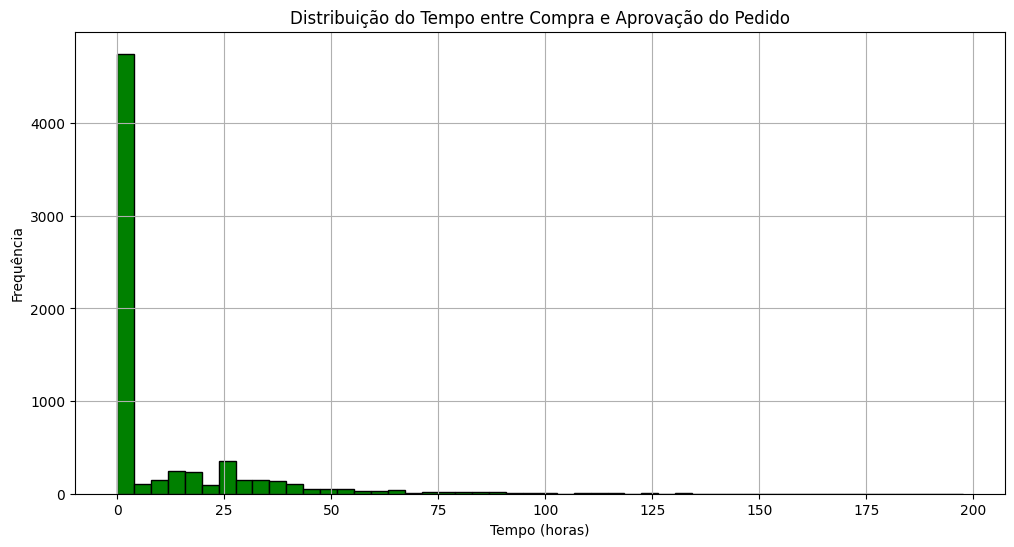

In [ ]:
plt.figure(figsize=(12, 6))
plt.hist(df['time_to_approval'], bins=50, color='green', edgecolor='black')
plt.title('Distribuição do Tempo entre Compra e Aprovação do Pedido')
plt.xlabel('Tempo (horas)')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

<ipython-input-214-67ef53b73d4c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['order_delivered_customer_date'] = pd.to_datetime(new_df['order_delivered_customer_date'])
<ipython-input-214-67ef53b73d4c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['order_estimated_delivery_date'] = pd.to_datetime(new_df['order_estimated_delivery_date'], format='ISO8601')
<ipython-input-214-67ef53b73d4c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

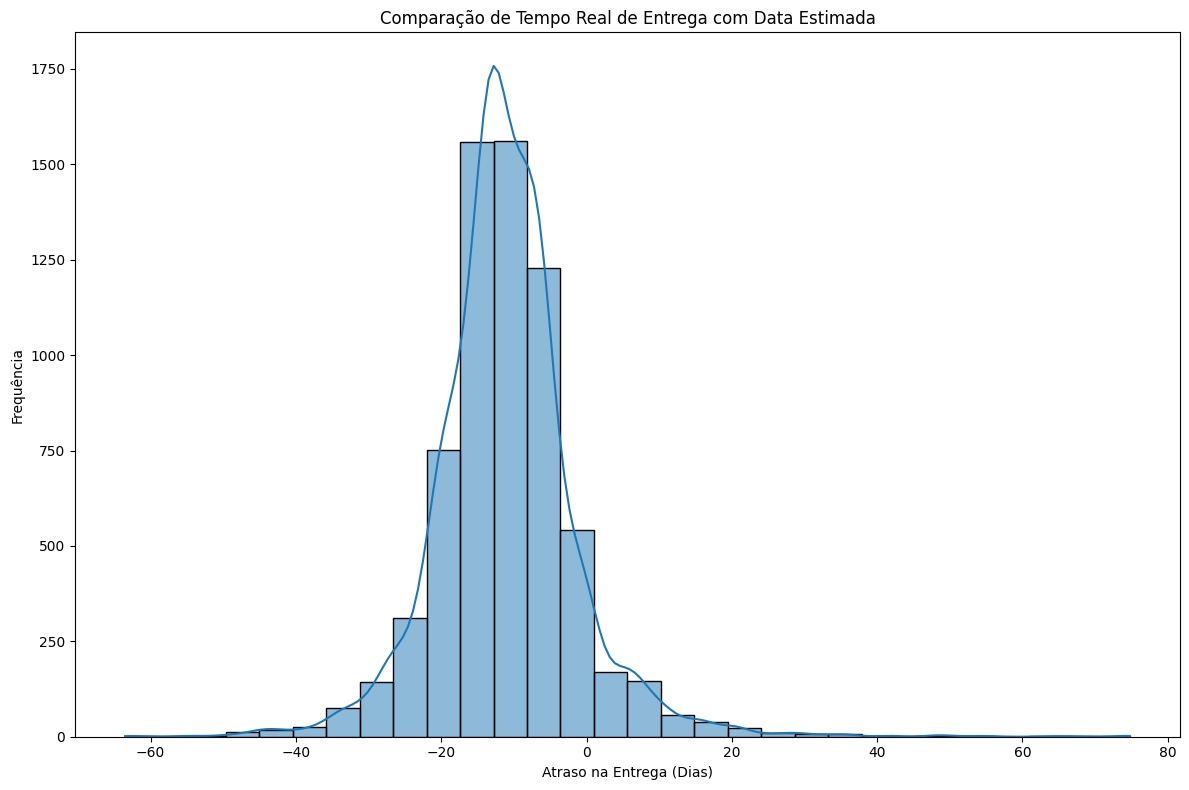

In [ ]:
#Como o tempo real de entrega se compara com a data estimada?


new_df['order_delivered_customer_date'] = pd.to_datetime(new_df['order_delivered_customer_date'])
new_df['order_estimated_delivery_date'] = pd.to_datetime(new_df['order_estimated_delivery_date'], format='ISO8601')
new_df['delivery_delay'] = (new_df['order_delivered_customer_date'] - new_df['order_estimated_delivery_date']).dt.total_seconds() / (3600 * 24)

# Filtrar dados válidos
df = new_df[new_df['time_to_approval'] >= 0]

# Comparar tempo real com estimado
plt.figure(figsize=(12, 8))
sns.histplot(data=df, x='delivery_delay', bins=30, kde=True)

plt.xlabel('Atraso na Entrega (Dias)')
plt.ylabel('Frequência')
plt.title('Comparação de Tempo Real de Entrega com Data Estimada')
plt.tight_layout()
plt.show()

In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6895 entries, 0 to 6894
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_purchase_timestamp       6895 non-null   datetime64[ns]
 1   order_approved_at              6880 non-null   datetime64[ns]
 2   order_delivered_carrier_date   6776 non-null   object        
 3   customer_city                  6895 non-null   object        
 4   customer_state                 6895 non-null   object        
 5   order_estimated_delivery_date  6895 non-null   object        
 6   order_delivered_customer_date  6700 non-null   datetime64[ns]
 7   time_to_approval               6880 non-null   float64       
dtypes: datetime64[ns](3), float64(1), object(4)
memory usage: 431.1+ KB


In [ ]:
df_localizacao

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
...,...,...,...,...,...
69988,3925,-23.602799,-46.508626,sao paulo,SP
69989,3951,-23.583533,-46.489575,sao paulo,SP
69990,3977,-23.620127,-46.491483,são paulo,SP
69991,3967,-23.599374,-46.472492,sao paulo,SP


<ipython-input-215-0a162fce9315>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['order_delivered_customer_date'] = pd.to_datetime(df['order_delivered_customer_date'])
<ipython-input-215-0a162fce9315>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['order_estimated_delivery_date'] = pd.to_datetime(df['order_estimated_delivery_date'])
<ipython-input-215-0a162fce9315>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

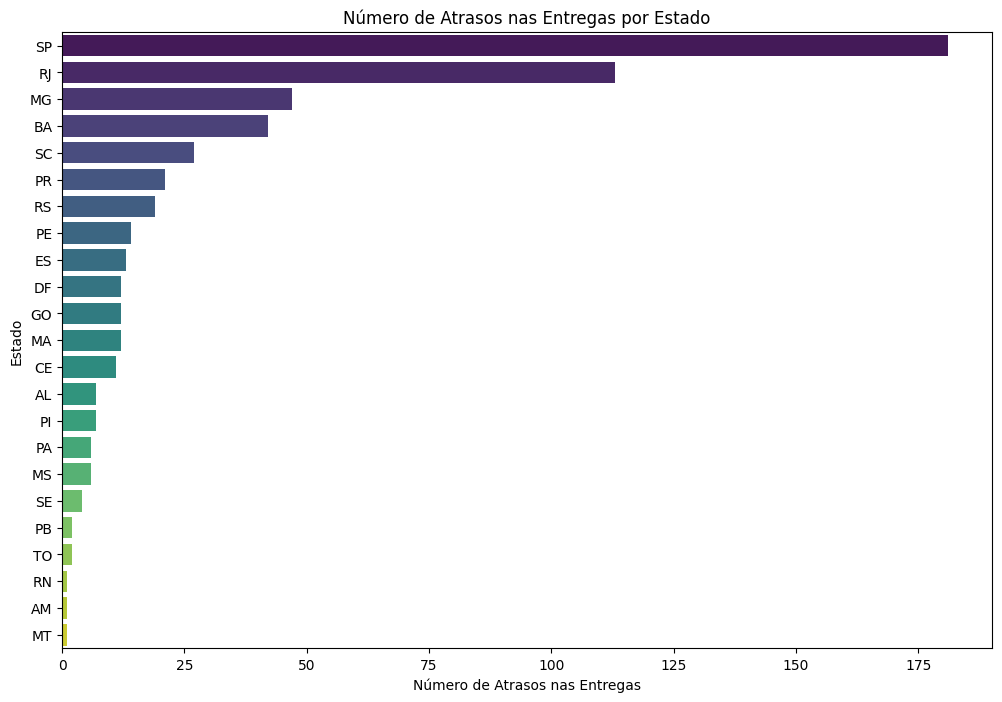

In [ ]:
#Quais regiões têm frequentes atrasos nas entregas?
df['order_delivered_customer_date'] = pd.to_datetime(df['order_delivered_customer_date'])
df['order_estimated_delivery_date'] = pd.to_datetime(df['order_estimated_delivery_date'])
df['delivery_delay'] = (df['order_delivered_customer_date'] - df['order_estimated_delivery_date']).dt.total_seconds() / (24 * 3600)

grouped = df[df['delivery_delay'] > 0].groupby('customer_state')['delivery_delay'].count().reset_index()

grouped = grouped.sort_values(by='delivery_delay', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(data=grouped, x='delivery_delay', y='customer_state', palette='viridis')

plt.xlabel('Número de Atrasos nas Entregas')
plt.ylabel('Estado')
plt.title('Número de Atrasos nas Entregas por Estado')
plt.show()

In [ ]:
new_df.to_csv('base_final_s14_olist.csv', index=False)